In [1]:
from bs4 import BeautifulSoup
from scrape import extract
from scrape import extract_players
from scrape import extract_year
from scrape import make_dists
from scrape import extract_age
from scrape import run_knn
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import re
import matplotlib.pyplot as plt
from scrape import read_targets
from scrape import clean_name
from sklearn.svm import SVR
from sklearn.preprocessing import scale

In [2]:
df2022 = extract_players("2022", "te", "PPR")
df2022

,Name,RECEIVING_REC,RECEIVING_TGT,RECEIVING_YDS,RECEIVING_Y/R,RECEIVING_LG,RECEIVING_20+,RECEIVING_TD,RUSHING_ATT,RUSHING_YDS,RUSHING_TD,MISC_FL,MISC_G,MISC_FPTS,MISC_FPTS/G,MISC_ROST,name
Rank,,,,,,,,,,,,,,,,,
1,Travis Kelce (KC),110,152,1338,12.2,52,29,12,2,5,0,1,17,316.3,18.6,100.0%,travis-kelce
2,T.J. Hockenson (MIN),86,129,914,10.6,81,12,6,0,0,0,1,17,215.4,12.7,99.3%,tj-hockenson
3,George Kittle (SF),60,86,765,12.8,54,20,11,0,0,0,1,15,200.5,13.4,99.0%,george-kittle
4,Mark Andrews (BAL),73,113,847,11.6,36,8,5,3,8,0,0,15,190.5,12.7,99.9%,mark-andrews
5,Evan Engram (JAC),73,98,766,10.5,36,11,4,2,13,0,0,17,176.9,10.4,94.2%,evan-engram
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,James Winchester (KC),0,0,0,0.0,0,0,0,0,0,0,0,3,0.0,0.0,0.0%,james-winchester
231,Patrick Scales (CHI),0,0,0,0.0,0,0,0,0,0,0,0,5,0.0,0.0,0.0%,patrick-scales
232,Andrew DePaola (MIN),0,0,0,0.0,0,0,0,0,0,0,0,3,0.0,0.0,0.0%,andrew-depaola


In [3]:
production2022 = df2022[['name', 'MISC_FPTS/G']]

In [4]:
names2022 = list(df2022["name"].head(50))
dists2022 = make_dists(names2022, "2022", "te")
dists2022.head(20)

travis-kelce
tj-hockenson
george-kittle
mark-andrews
evan-engram
tyler-higbee
pat-freiermuth
cole-kmet
taysom-hill
dalton-schultz
david-njoku
dallas-goedert
gerald-everett
dawson-knox
juwan-johnson
tyler-conklin
noah-fant
jordan-akins
zach-ertz
robert-tonyan
hayden-hurst
hunter-henry
mike-gesicki
austin-hooper
chigoziem-okonkwo
cade-otton
isaiah-likely
will-dissly
greg-dulcich
foster-moreau
darren-waller
logan-thomas
kyle-pitts
daniel-bellinger
jelani-woods
noah-gray
colby-parkinson
brock-wright
harrison-bryant
trey-mcbride
kylen-granson
cj-uzomah
irv-smith-jr
mycole-pruitt
mo-alie-cox
tommy-tremble
jonnu-smith
jake-ferguson
adam-trautman
shane-zylstra


c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
0,travis-kelce,32,17,6.470588,1.943848,8.941176,2.363213,78.705882,29.891499,12.617647,4.351637,27.058824,11.709577,0.705882,1.125360,23.3,0
1,tj-hockenson,25,17,5.058824,2.959940,7.588235,3.565502,53.764706,40.394422,10.929412,5.629519,20.882353,18.556376,0.352941,0.680932,19.2,0
2,george-kittle,28,15,4.000000,1.712698,5.733333,2.143725,51.000000,33.093806,12.880000,5.734713,23.133333,11.723860,0.733333,0.853750,16.8,0
3,mark-andrews,26,15,4.866667,2.729265,7.533333,2.777689,56.466667,33.304387,10.600000,3.453887,18.866667,8.048740,0.333333,0.596285,23.2,0
4,evan-engram,27,17,4.294118,2.802619,5.764706,3.638510,45.058824,40.303949,10.164706,4.328421,15.764706,8.775162,0.235294,0.545507,16.4,1
5,tyler-higbee,29,16,4.500000,2.850439,6.750000,3.526684,38.750000,27.864628,7.731250,3.253982,12.937500,7.163002,0.187500,0.526634,20.3,1
6,pat-freiermuth,23,15,4.200000,2.286190,6.533333,2.753584,48.800000,25.672813,11.493333,5.835348,20.200000,12.644894,0.133333,0.339935,17.2,1
7,cole-kmet,23,17,2.941176,1.661700,4.058824,1.862023,32.000000,20.962151,10.117647,5.707398,16.823529,11.423584,0.411765,0.691020,18.3,1
8,taysom-hill,31,16,0.562500,0.609175,0.812500,0.881671,4.812500,8.669045,3.718750,5.202069,4.500000,7.599342,0.125000,0.330719,2.5,2
9,dalton-schultz,26,15,3.800000,2.256841,5.933333,2.669998,38.466667,24.722100,8.880000,4.442102,14.000000,7.702813,0.333333,0.699206,16.0,1


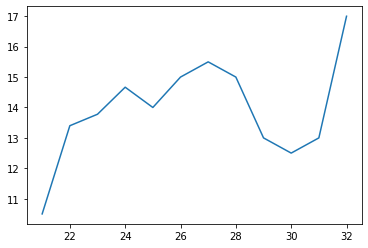

In [5]:
agepergames = dists2022[['age', 'games_played']]
df = agepergames.groupby('age')['games_played'].mean()
plt.plot(df)
plt.show()

In [6]:
dists2022[dists2022["class"] == 0]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
0,travis-kelce,32,17,6.470588,1.943848,8.941176,2.363213,78.705882,29.891499,12.617647,4.351637,27.058824,11.709577,0.705882,1.125360,23.3,0
1,tj-hockenson,25,17,5.058824,2.959940,7.588235,3.565502,53.764706,40.394422,10.929412,5.629519,20.882353,18.556376,0.352941,0.680932,19.2,0
2,george-kittle,28,15,4.000000,1.712698,5.733333,2.143725,51.000000,33.093806,12.880000,5.734713,23.133333,11.723860,0.733333,0.853750,16.8,0
3,mark-andrews,26,15,4.866667,2.729265,7.533333,2.777689,56.466667,33.304387,10.600000,3.453887,18.866667,8.048740,0.333333,0.596285,23.2,0


In [7]:
dists2022[dists2022["class"] == 1]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
4,evan-engram,27,17,4.294118,2.802619,5.764706,3.638510,45.058824,40.303949,10.164706,4.328421,15.764706,8.775162,0.235294,0.545507,16.4,1
5,tyler-higbee,29,16,4.500000,2.850439,6.750000,3.526684,38.750000,27.864628,7.731250,3.253982,12.937500,7.163002,0.187500,0.526634,20.3,1
6,pat-freiermuth,23,15,4.200000,2.286190,6.533333,2.753584,48.800000,25.672813,11.493333,5.835348,20.200000,12.644894,0.133333,0.339935,17.2,1
7,cole-kmet,23,17,2.941176,1.661700,4.058824,1.862023,32.000000,20.962151,10.117647,5.707398,16.823529,11.423584,0.411765,0.691020,18.3,1
9,dalton-schultz,26,15,3.800000,2.256841,5.933333,2.669998,38.466667,24.722100,8.880000,4.442102,14.000000,7.702813,0.333333,0.699206,16.0,1
10,david-njoku,26,14,4.142857,2.356060,5.714286,2.281246,44.857143,26.856383,11.200000,4.410053,19.000000,8.459990,0.285714,0.451754,14.8,1
12,gerald-everett,28,15,3.866667,1.407914,5.800000,2.256841,37.000000,23.047776,9.193333,4.699002,15.000000,7.118052,0.266667,0.442217,12.2,1
13,dawson-knox,25,15,3.200000,1.720465,4.333333,2.086997,34.466667,25.221331,9.273333,4.123019,17.066667,10.363183,0.400000,0.489898,11.3,1
14,juwan-johnson,25,16,2.625000,1.690969,4.062500,2.105610,31.750000,19.753164,11.493750,6.410584,17.312500,9.910340,0.437500,0.704339,12.7,1
15,tyler-conklin,26,17,3.411765,2.170899,5.117647,2.676309,32.470588,26.663740,8.811765,4.771593,14.411765,9.719954,0.176471,0.512812,13.9,1


In [8]:
dists2022[dists2022['class'] == 2]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
8,taysom-hill,31,16,0.562500,0.609175,0.812500,0.881671,4.812500,8.669045,3.718750,5.202069,4.500000,7.599342,0.125000,0.330719,2.5,2
23,austin-hooper,27,17,2.411765,1.374508,3.529412,1.719016,26.117647,17.983268,10.370588,4.681599,13.117647,6.076787,0.117647,0.470588,13.2,2
27,will-dissly,26,15,2.266667,0.928559,2.533333,1.024153,23.266667,12.173560,10.580000,4.085454,15.333333,7.363574,0.200000,0.400000,6.6,2
31,logan-thomas,31,13,3.000000,1.881080,4.692308,1.681785,24.846154,20.049347,7.338462,4.075355,11.615385,7.098629,0.076923,0.266469,11.0,2
33,daniel-bellinger,21,11,2.727273,1.420045,3.181818,1.402477,24.363636,11.275659,9.809091,3.833217,13.090909,5.282123,0.181818,0.385695,6.7,2
35,noah-gray,23,17,1.647059,0.903664,2.000000,0.840168,17.588235,12.127067,10.476471,5.525186,12.882353,6.944167,0.058824,0.235294,5.2,2
38,harrison-bryant,24,14,2.214286,1.080910,3.000000,1.772811,17.071429,12.068047,7.057143,3.536486,10.642857,6.596613,0.071429,0.257539,7.8,2
39,trey-mcbride,22,12,2.416667,2.019007,3.250000,2.802529,22.083333,23.862308,6.091667,5.010565,10.416667,10.103286,0.083333,0.276385,5.9,2
40,kylen-granson,24,13,2.384615,1.332347,3.076923,1.817079,23.230769,18.473073,9.276923,5.577862,13.615385,7.995561,0.000000,0.000000,6.6,2
42,irv-smith-jr,23,8,3.125000,1.452369,4.500000,1.732051,22.750000,13.699909,6.862500,4.676520,10.000000,5.477226,0.250000,0.433013,5.4,2


In [9]:
dists2022[dists2022["class"] == 3]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
11,dallas-goedert,27,12,4.583333,1.977302,5.750000,1.920286,58.500000,25.627134,13.191667,4.453362,21.250000,5.387099,0.250000,0.433013,12.9,3
28,greg-dulcich,22,10,3.300000,1.734935,5.500000,2.418677,41.100000,26.432745,12.530000,5.325983,20.300000,10.945775,0.200000,0.400000,9.6,3
30,darren-waller,29,9,3.111111,1.523479,4.777778,2.096440,43.111111,23.923231,12.822222,7.047738,20.777778,9.589088,0.333333,0.471405,7.3,3
32,kyle-pitts,21,10,2.800000,1.249000,5.900000,2.071232,35.600000,25.389762,12.850000,5.869114,17.800000,8.304216,0.200000,0.400000,14.2,3


In [10]:
dists2022[dists2022["class"] == 4]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
17,jordan-akins,30,15,2.466667,1.203698,3.600000,1.854724,33.000000,23.988886,11.633333,6.899243,20.266667,13.293942,0.333333,0.596285,9.3,4
21,hunter-henry,27,16,2.562500,1.618979,3.687500,2.022336,31.812500,22.628021,12.031250,6.587746,18.500000,11.677971,0.125000,0.330719,10.9,4
22,mike-gesicki,26,17,1.882353,1.604492,3.058824,2.013793,21.294118,19.377867,9.411765,8.071364,13.058824,10.315440,0.294118,0.570315,8.9,4
24,chigoziem-okonkwo,22,16,2.000000,1.695582,2.875000,1.727534,28.125000,21.056101,14.275000,13.695962,18.812500,15.013405,0.187500,0.390312,10.1,4
29,foster-moreau,25,14,2.357143,1.394230,3.857143,2.099563,30.000000,13.840933,14.164286,8.966095,18.285714,8.963645,0.142857,0.349927,9.2,4
34,jelani-woods,23,12,2.083333,1.977302,3.333333,2.134375,26.000000,25.609243,12.575000,10.818204,16.333333,11.692828,0.250000,0.595119,6.6,4
36,colby-parkinson,23,14,1.785714,1.145087,2.428571,1.545236,23.000000,16.801360,12.407143,8.269865,17.000000,12.071217,0.142857,0.349927,5.9,4
37,brock-wright,23,14,1.285714,1.160577,1.714286,1.160577,15.428571,17.994897,9.935714,13.344801,11.571429,13.626205,0.285714,0.589015,4.1,4
41,cj-uzomah,29,14,1.500000,0.981981,1.928571,1.667517,16.571429,12.187314,11.357143,10.475462,13.857143,12.310606,0.142857,0.515079,4.3,4
46,jonnu-smith,26,12,2.250000,1.299038,3.166667,0.799305,20.416667,17.423444,7.841667,7.804535,13.750000,14.236836,0.000000,0.000000,7.0,4


2021 Data

In [11]:
df2021 = extract_players("2021", "te", "PPR")

In [12]:
production2021 = df2021[['name', 'MISC_FPTS/G']]

In [13]:
names2021 = list(df2021["name"].head(50))
dists2021 = make_dists(names2021, "2021", "te")
dists2021.head(20)

mark-andrews
travis-kelce
dalton-schultz
george-kittle
zach-ertz
kyle-pitts
rob-gronkowski
dallas-goedert
mike-gesicki
hunter-henry
dawson-knox
noah-fant
pat-freiermuth
tyler-higbee
tj-hockenson
tyler-conklin
darren-waller
jared-cook
cj-uzomah
cole-kmet
gerald-everett
david-njoku
evan-engram
austin-hooper
foster-moreau
mo-alie-cox
jack-doyle
cameron-brate
albert-okwuegbunam
dan-arnold
anthony-firkser
durham-smythe
geoff-swaim
ricky-seals-jones
jonnu-smith
ryan-griffin
hayden-hurst
adam-trautman
harrison-bryant
josiah-deguara
kyle-rudolph
donald-parham
brevin-jordan
logan-thomas
tommy-tremble
juwan-johnson
john-bates
jimmy-graham
james-oshaughnessy
robert-tonyan


c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
0,mark-andrews,25,17,6.294118,2.515007,9.000000,2.828427,80.058824,34.339945,12.858824,3.444016,26.117647,9.405145,0.529412,0.696009,25.2,0
1,travis-kelce,31,16,5.750000,1.920286,8.375000,2.496873,70.312500,44.641235,11.306250,3.887555,23.562500,14.794293,0.562500,0.704339,19.9,0
2,dalton-schultz,25,17,4.588235,2.170899,6.117647,2.373440,47.529412,25.186639,10.170588,3.345368,16.647059,7.153289,0.470588,0.696009,16.1,1
3,george-kittle,27,14,5.071429,3.058111,6.714286,3.692242,65.000000,51.343382,13.135714,6.613040,22.928571,11.768386,0.428571,0.622700,18.3,0
4,zach-ertz,30,17,4.352941,2.299391,6.588235,3.088095,44.882353,24.190135,10.588235,4.012463,18.588235,9.468579,0.294118,0.570315,19.0,1
5,kyle-pitts,20,17,4.000000,1.909727,6.470588,1.684450,60.352941,38.452325,14.870588,6.918667,27.470588,13.958416,0.058824,0.235294,19.2,2
6,rob-gronkowski,32,12,4.583333,2.465033,7.333333,3.009245,66.833333,40.607539,13.725000,5.469937,23.833333,9.965217,0.500000,0.866025,12.2,0
7,dallas-goedert,26,15,3.733333,1.878534,5.066667,2.048306,55.333333,32.990234,14.620000,6.897555,21.733333,10.723598,0.266667,0.573488,15.4,2
8,mike-gesicki,25,17,4.294118,2.561358,6.588235,2.590908,45.882353,29.083819,9.558824,4.439801,18.647059,10.243742,0.117647,0.322190,18.0,1
9,hunter-henry,26,16,3.125000,1.615356,4.687500,1.721872,37.687500,21.756375,12.912500,6.214487,19.062500,8.340179,0.562500,0.704339,14.0,2


In [14]:
dists2021prod = pd.merge(dists2021, production2022, how = 'inner', on = ['name'])

In [15]:
dists2021[dists2021["class"] == 0]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
0,mark-andrews,25,17,6.294118,2.515007,9.000000,2.828427,80.058824,34.339945,12.858824,3.444016,26.117647,9.405145,0.529412,0.696009,25.2,0
1,travis-kelce,31,16,5.750000,1.920286,8.375000,2.496873,70.312500,44.641235,11.306250,3.887555,23.562500,14.794293,0.562500,0.704339,19.9,0
3,george-kittle,27,14,5.071429,3.058111,6.714286,3.692242,65.000000,51.343382,13.135714,6.613040,22.928571,11.768386,0.428571,0.622700,18.3,0
6,rob-gronkowski,32,12,4.583333,2.465033,7.333333,3.009245,66.833333,40.607539,13.725000,5.469937,23.833333,9.965217,0.500000,0.866025,12.2,0


In [16]:
dists2021[dists2021["class"] == 1]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
2,dalton-schultz,25,17,4.588235,2.170899,6.117647,2.373440,47.529412,25.186639,10.170588,3.345368,16.647059,7.153289,0.470588,0.696009,16.1,1
4,zach-ertz,30,17,4.352941,2.299391,6.588235,3.088095,44.882353,24.190135,10.588235,4.012463,18.588235,9.468579,0.294118,0.570315,19.0,1
8,mike-gesicki,25,17,4.294118,2.561358,6.588235,2.590908,45.882353,29.083819,9.558824,4.439801,18.647059,10.243742,0.117647,0.322190,18.0,1
11,noah-fant,23,16,4.250000,1.920286,5.625000,2.420615,41.875000,25.975650,9.543750,3.350181,17.375000,8.880280,0.250000,0.433013,16.6,1
12,pat-freiermuth,22,16,3.750000,1.639360,4.937500,2.435897,31.062500,14.319867,9.306250,4.892273,13.687500,4.983959,0.437500,0.609175,11.9,1
13,tyler-higbee,28,15,4.066667,1.611073,5.666667,2.385139,37.333333,19.478763,8.580000,2.284790,15.600000,7.914544,0.333333,0.596285,14.0,1
14,tj-hockenson,24,12,5.083333,2.928547,7.000000,3.559026,48.583333,28.455985,8.800000,3.321646,18.500000,8.519585,0.333333,0.471405,14.0,1
15,tyler-conklin,25,17,3.588235,1.717002,5.117647,2.138783,34.882353,20.467714,9.717647,4.500488,17.470588,8.486097,0.176471,0.512812,14.4,1
16,darren-waller,28,11,5.000000,2.215647,8.454545,3.701686,60.454545,30.209462,12.100000,2.779470,23.636364,5.866278,0.181818,0.385695,14.8,1
19,cole-kmet,22,17,3.529412,1.973878,5.470588,2.403861,36.000000,23.612061,9.629412,3.472034,14.882353,6.910200,0.000000,0.000000,17.2,1


In [17]:
dists2021[dists2021["class"] == 2]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
5,kyle-pitts,20,17,4.000000,1.909727,6.470588,1.684450,60.352941,38.452325,14.870588,6.918667,27.470588,13.958416,0.058824,0.235294,19.2,2
7,dallas-goedert,26,15,3.733333,1.878534,5.066667,2.048306,55.333333,32.990234,14.620000,6.897555,21.733333,10.723598,0.266667,0.573488,15.4,2
9,hunter-henry,26,16,3.125000,1.615356,4.687500,1.721872,37.687500,21.756375,12.912500,6.214487,19.062500,8.340179,0.562500,0.704339,14.0,2
10,dawson-knox,24,15,3.266667,1.768867,4.733333,2.489087,39.133333,28.934101,11.580000,8.376013,19.000000,12.361230,0.600000,0.711805,10.8,2
18,cj-uzomah,28,16,3.062500,1.248437,3.937500,1.784263,30.812500,27.208038,9.093750,7.424913,15.187500,13.477846,0.312500,0.681795,11.4,2
20,gerald-everett,27,15,3.200000,1.833030,4.200000,2.103965,31.866667,21.234772,10.360000,5.563788,16.200000,10.114017,0.266667,0.442217,12.7,2
21,david-njoku,25,15,2.400000,1.583246,3.533333,1.454495,31.666667,35.819300,11.000000,6.182017,18.266667,17.156016,0.266667,0.442217,10.2,2
24,foster-moreau,24,15,2.000000,2.065591,2.933333,2.542090,24.866667,24.021842,11.093333,9.477304,14.866667,12.929896,0.200000,0.400000,7.0,2


In [18]:
dists2021[dists2021["class"] == 3]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
17,jared-cook,34,16,3.000000,1.322876,5.187500,1.549950,35.250000,19.100065,12.275000,5.503465,18.625000,8.380595,0.250000,0.433013,12.3,3
22,evan-engram,26,15,3.066667,1.436044,4.866667,1.359739,27.200000,16.561803,8.860000,3.546792,13.333333,6.425643,0.200000,0.400000,12.3,3
23,austin-hooper,26,15,2.533333,1.586050,4.066667,1.768867,23.000000,14.881756,8.286667,5.155821,12.000000,8.230026,0.200000,0.400000,11.7,3
26,jack-doyle,31,15,1.933333,1.691810,2.866667,2.276449,20.133333,23.102285,8.173333,6.419394,11.000000,9.681598,0.200000,0.400000,8.3,3
27,cameron-brate,30,16,1.875000,0.927025,3.562500,1.498697,15.312500,10.066769,7.512500,3.831755,9.375000,5.097487,0.250000,0.433013,7.8,3
30,anthony-firkser,26,15,2.266667,1.339983,2.866667,1.820867,19.400000,13.602941,8.480000,2.919635,10.666667,4.756282,0.133333,0.339935,8.0,3
33,ricky-seals-jones,26,11,2.727273,1.710444,4.454545,2.462949,24.636364,18.391069,8.636364,5.341309,14.090909,9.811446,0.181818,0.385695,8.9,3
35,ryan-griffin,31,14,1.928571,0.960973,3.000000,1.732051,18.642857,11.254251,10.000000,5.302829,13.142857,7.605047,0.142857,0.349927,7.0,3
37,adam-trautman,24,11,2.454545,1.616035,3.909091,2.574510,23.909091,19.406909,8.754545,6.515347,12.454545,9.680004,0.181818,0.385695,8.5,3
42,brevin-jordan,20,8,2.500000,1.118034,3.500000,1.658312,22.250000,17.034891,8.237500,3.620752,12.500000,7.729812,0.375000,0.484123,5.1,3


In [19]:
dists2021[dists2021["class"] == 4]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
25,mo-alie-cox,27,17,1.411765,1.087838,2.647059,1.325815,18.588235,16.233802,10.458824,9.187399,13.764706,11.769999,0.235294,0.545507,8.6,4
28,albert-okwuegbunam,23,14,2.357143,1.493182,2.857143,1.406980,23.571429,21.671951,8.614286,6.808908,14.642857,15.225013,0.142857,0.349927,7.4,4
31,durham-smythe,25,16,2.125000,1.576190,2.562500,1.657134,22.312500,16.866086,8.900000,6.192233,12.812500,8.625679,0.000000,0.000000,6.7,4
32,geoff-swaim,27,16,1.937500,1.434780,2.500000,1.457738,13.125000,12.613856,5.368750,3.872131,8.187500,7.551645,0.187500,0.390312,7.5,4
34,jonnu-smith,25,16,1.750000,1.346291,2.812500,1.878122,18.375000,16.393120,9.462500,7.203374,12.062500,8.242184,0.062500,0.242061,8.4,4
36,hayden-hurst,27,12,2.166667,1.280191,2.583333,1.381927,18.416667,13.732312,8.458333,8.174703,11.166667,8.374896,0.250000,0.433013,5.4,4
38,harrison-bryant,23,15,1.400000,1.083205,1.866667,1.024153,15.533333,16.528225,7.933333,6.555473,11.800000,11.906301,0.200000,0.400000,5.4,4
39,josiah-deguara,24,14,1.785714,0.939496,2.357143,1.444553,17.500000,18.348803,7.535714,6.383081,12.857143,15.564874,0.142857,0.349927,5.6,4
40,kyle-rudolph,31,15,1.733333,1.123487,2.600000,1.624808,17.133333,15.413702,9.920000,9.057755,13.666667,14.098069,0.066667,0.249444,6.6,4
41,donald-parham,23,14,1.428571,1.178030,1.928571,1.386892,13.571429,13.281105,7.107143,6.431448,9.500000,7.817106,0.214286,0.410326,4.0,4


2020 Data

In [20]:
df2020 = extract_players("2020", "te", "PPR")

In [21]:
names2020 = list(df2020["name"].head(50))
dists2020 = make_dists(names2020, "2020", "te")
dists2020.head(20)

travis-kelce
darren-waller
logan-thomas
robert-tonyan
tj-hockenson
mark-andrews
mike-gesicki
rob-gronkowski
noah-fant
hayden-hurst
dalton-schultz
hunter-henry
jimmy-graham
eric-ebron
evan-engram
jonnu-smith
tyler-higbee
jared-cook
george-kittle
dallas-goedert
austin-hooper
irv-smith-jr
dan-arnold
gerald-everett
jordan-akins
anthony-firkser
trey-burton
tyler-eifert
mo-alie-cox
drew-sample
zach-ertz
darren-fells
chris-herndon-iv
jordan-reed
richard-rodgers
cameron-brate
dawson-knox
jacob-hollister
kyle-rudolph
jack-doyle
cole-kmet
harrison-bryant
will-dissly
durham-smythe
james-oshaughnessy
greg-olsen
david-njoku
ross-dwelley
adam-shaheen
tyler-conklin


c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
0,travis-kelce,30,15,7.000000,1.966384,9.666667,3.047768,94.400000,34.140494,13.673333,3.811293,26.066667,9.219303,0.733333,0.573488,23.0,0
1,darren-waller,27,16,6.687500,2.952091,9.062500,3.543811,74.750000,50.923349,10.450000,4.725595,20.750000,10.127315,0.562500,0.609175,26.3,0
2,logan-thomas,29,16,4.500000,2.958040,6.875000,3.257204,41.875000,28.462420,9.100000,3.726090,16.375000,8.252840,0.375000,0.484123,1.5,1
3,robert-tonyan,26,16,3.250000,1.750000,3.687500,1.861409,36.625000,25.556005,10.381250,4.534757,19.625000,11.688001,0.687500,0.768013,0.8,2
4,tj-hockenson,23,16,4.187500,1.628602,6.312500,2.310810,45.187500,24.764437,10.343750,3.850482,19.562500,11.352140,0.375000,0.484123,17.4,1
5,mark-andrews,24,14,4.142857,1.641304,6.285714,2.118914,50.071429,23.611330,12.921429,5.893965,20.571429,8.649643,0.500000,0.731925,4.2,2
6,mike-gesicki,24,15,3.533333,2.499778,5.666667,2.867442,46.866667,33.842511,12.700000,4.803610,23.000000,14.746751,0.400000,0.611010,15.2,1
7,rob-gronkowski,31,16,2.812500,1.810344,4.812500,2.242174,38.937500,28.325052,13.187500,8.761840,20.375000,13.864861,0.437500,0.609175,1.0,2
8,noah-fant,22,15,4.133333,1.995551,6.200000,2.879815,44.866667,20.902525,10.633333,4.231259,19.533333,9.618501,0.200000,0.400000,16.7,1
9,hayden-hurst,26,16,3.500000,1.936492,5.500000,1.837117,35.687500,24.260871,8.743750,4.284561,16.500000,10.931606,0.375000,0.484123,14.0,1


In [22]:
dists2020prod = pd.merge(dists2020, production2021, how = 'inner', on = ['name'])

In [23]:
dists2020[dists2020["class"] == 0]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
0,travis-kelce,30,15,7.0000,1.966384,9.666667,3.047768,94.40,34.140494,13.673333,3.811293,26.066667,9.219303,0.733333,0.573488,23.0,0
1,darren-waller,27,16,6.6875,2.952091,9.062500,3.543811,74.75,50.923349,10.450000,4.725595,20.750000,10.127315,0.562500,0.609175,26.3,0
18,george-kittle,26,8,6.0000,3.741657,7.875000,3.333073,79.25,45.595367,14.125000,4.505760,27.000000,11.979149,0.250000,0.433013,11.1,0


In [24]:
dists2020[dists2020["class"] == 1]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
2,logan-thomas,29,16,4.500000,2.958040,6.875000,3.257204,41.875000,28.462420,9.100000,3.726090,16.375000,8.252840,0.375000,0.484123,1.5,1
4,tj-hockenson,23,16,4.187500,1.628602,6.312500,2.310810,45.187500,24.764437,10.343750,3.850482,19.562500,11.352140,0.375000,0.484123,17.4,1
6,mike-gesicki,24,15,3.533333,2.499778,5.666667,2.867442,46.866667,33.842511,12.700000,4.803610,23.000000,14.746751,0.400000,0.611010,15.2,1
8,noah-fant,22,15,4.133333,1.995551,6.200000,2.879815,44.866667,20.902525,10.633333,4.231259,19.533333,9.618501,0.200000,0.400000,16.7,1
9,hayden-hurst,26,16,3.500000,1.936492,5.500000,1.837117,35.687500,24.260871,8.743750,4.284561,16.500000,10.931606,0.375000,0.484123,14.0,1
10,dalton-schultz,24,16,3.937500,2.045384,5.562500,2.370885,38.437500,22.915521,9.675000,3.088790,15.125000,5.688530,0.250000,0.433013,13.9,1
11,hunter-henry,25,14,4.285714,1.531972,6.642857,1.985920,43.785714,21.142978,10.135714,3.863309,16.857143,7.443666,0.285714,0.451754,14.8,1
13,eric-ebron,27,15,3.733333,2.048306,6.066667,2.644911,37.200000,17.750869,10.213333,4.768629,16.666667,6.896054,0.333333,0.471405,1.7,1
14,evan-engram,25,16,3.937500,1.886424,6.812500,2.788789,40.875000,28.965227,10.262500,4.141992,18.125000,10.792793,0.062500,0.242061,21.1,1
19,dallas-goedert,25,11,4.181818,2.036851,5.909091,2.906249,47.636364,27.347171,11.181818,2.736892,21.545455,10.307664,0.272727,0.445362,10.9,1


In [25]:
dists2020[dists2020["class"] == 2]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
3,robert-tonyan,26,16,3.250000,1.750000,3.687500,1.861409,36.625000,25.556005,10.381250,4.534757,19.625000,11.688001,0.687500,0.768013,0.8,2
5,mark-andrews,24,14,4.142857,1.641304,6.285714,2.118914,50.071429,23.611330,12.921429,5.893965,20.571429,8.649643,0.500000,0.731925,4.2,2
7,rob-gronkowski,31,16,2.812500,1.810344,4.812500,2.242174,38.937500,28.325052,13.187500,8.761840,20.375000,13.864861,0.437500,0.609175,1.0,2
12,jimmy-graham,33,16,3.125000,1.832860,4.750000,2.487469,28.500000,19.374597,8.318750,4.981493,13.937500,8.518133,0.500000,0.707107,0.3,2
15,jonnu-smith,24,15,2.733333,1.611073,4.333333,2.412928,29.866667,21.712874,10.206667,4.723059,17.133333,14.179171,0.533333,0.718022,0.6,2
16,tyler-higbee,27,15,2.933333,0.997775,4.000000,1.414214,34.733333,18.167615,11.873333,5.416822,21.733333,11.427841,0.333333,0.788811,0.8,2
17,jared-cook,33,15,2.466667,1.454495,4.000000,1.673320,33.600000,24.368833,11.673333,7.438590,18.933333,14.134906,0.466667,0.498888,11.5,2
21,irv-smith-jr,21,13,2.307692,1.726919,3.307692,2.299987,28.076923,23.096658,9.861538,5.743296,15.153846,10.501620,0.384615,0.737820,8.3,2
22,dan-arnold,25,16,1.937500,1.197328,2.812500,1.509087,27.375000,19.107835,12.743750,8.226555,18.500000,14.487063,0.250000,0.559017,7.8,2


In [26]:
dists2020[dists2020["class"] == 3]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
23,gerald-everett,26,16,2.562500,1.579903,3.875000,2.315032,26.062500,19.973322,9.781250,5.035650,14.437500,8.381294,0.062500,0.242061,0.3,3
24,jordan-akins,28,13,2.846154,1.874778,3.769231,1.846154,31.000000,22.921270,9.869231,5.146079,13.769231,7.627419,0.076923,0.266469,9.0,3
25,anthony-firkser,25,16,2.437500,1.999023,3.312500,2.416577,24.187500,27.511858,8.156250,5.639810,12.500000,10.758717,0.062500,0.242061,0.4,3
27,tyler-eifert,29,15,2.400000,1.356466,4.000000,1.966384,23.266667,15.075219,9.106667,4.212753,12.466667,6.489650,0.133333,0.339935,9.7,3
28,mo-alie-cox,26,15,2.066667,1.289272,2.600000,1.583246,26.266667,26.385518,10.400000,6.095572,15.066667,11.221804,0.133333,0.339935,0.7,3
30,zach-ertz,29,11,3.272727,1.600620,6.545455,2.061052,30.454545,21.580141,10.118182,8.454027,15.090909,11.065545,0.090909,0.287480,12.0,3
31,darren-fells,34,16,1.312500,1.488235,1.750000,1.713914,19.500000,22.599779,9.606250,8.600179,12.812500,12.733905,0.250000,0.433013,5.1,3
32,jordan-reed,30,10,2.600000,1.907878,4.600000,1.959592,23.100000,18.790689,7.520000,3.669550,11.900000,7.091544,0.400000,0.663325,8.1,3
33,richard-rodgers,28,14,1.714286,1.829464,2.214286,2.540488,24.642857,26.953948,8.457143,8.184630,13.071429,12.464030,0.142857,0.349927,5.2,3
35,dawson-knox,23,12,2.000000,1.154701,3.666667,2.094968,24.000000,14.212670,12.233333,8.980937,15.416667,9.767790,0.250000,0.433013,0.8,3


In [27]:
dists2020[dists2020["class"] == 4]

,name,age,games_played,avg_rec,var_rec,avg_tgt,var_tgt,avg_yds,var_yds,avg_ypr,var_ypr,avg_lg,var_lg,avg_TD,var_TD,TM TGT %,class
26,trey-burton,28,13,2.153846,1.459513,3.615385,1.902972,19.230769,16.390212,7.507692,4.534562,10.153846,6.049109,0.230769,0.421325,0.5,4
29,drew-sample,24,16,2.500000,2.150581,3.312500,2.442303,21.812500,18.588366,7.406250,4.433321,9.875000,6.527586,0.062500,0.242061,9.1,4
34,cameron-brate,29,16,1.750000,1.561249,2.125000,1.899836,17.625000,17.258603,7.112500,5.364335,9.687500,8.005613,0.125000,0.330719,1.8,4
36,jacob-hollister,26,16,1.562500,1.273222,2.500000,2.061553,13.062500,14.227916,6.468750,4.914356,8.375000,6.283659,0.187500,0.390312,0.9,4
38,jack-doyle,30,14,1.642857,1.342021,2.357143,1.444553,17.928571,17.547748,7.492857,5.558837,10.500000,9.240826,0.214286,0.410326,1.6,4
39,cole-kmet,21,16,1.750000,1.952562,2.750000,2.633913,15.187500,16.191119,6.256250,5.882492,8.437500,9.293605,0.125000,0.330719,0.7,4
40,harrison-bryant,22,15,1.600000,1.404754,2.533333,2.061283,15.866667,16.181746,7.026667,5.217339,9.333333,8.836792,0.200000,0.541603,0.2,4
41,will-dissly,24,16,1.500000,1.000000,1.812500,1.285435,15.687500,9.954388,10.887500,7.581381,12.500000,7.992184,0.125000,0.330719,0.4,4
42,durham-smythe,24,15,1.733333,1.289272,1.933333,1.236482,13.866667,11.318814,6.666667,5.130389,8.466667,5.908939,0.133333,0.339935,5.2,4
43,james-oshaughnessy,28,15,1.866667,1.257864,2.533333,1.454495,17.466667,13.345994,8.193333,6.043450,10.933333,7.886416,0.000000,0.000000,6.2,4


In [28]:
# stack dists2020prod and dists2021prod
dists_prod = dists2021prod.append([dists2020prod], ignore_index=True)

In [29]:
mat = dists_prod.values
names = mat[:,0]
mean_fpts = mat[:,-1]
mat = np.delete(mat, 0, 1)  # delete name column of mat
mat = np.delete(mat, -1, 1)  # delete name column of mat
# Using sklearn
svr = SVR(kernel='rbf')
mat = scale(mat)
svr.fit(mat, mean_fpts)

SVR()

In [30]:
mat_test = dists2022.values
names2022 = mat_test[:,0]
mat_test = np.delete(mat_test, 0, 1)  # delete name column of mat
mat_test = scale(mat_test)
fpts_pred = svr.predict(mat_test)
results = pd.DataFrame([names2022,fpts_pred], index=["name", "proj fpts"]).T
classes = dists2022[['name', 'class']]
results = pd.merge(results, classes, how='inner', on=['name'])
results = results.sort_values('proj fpts', ascending=False)
results = results.reset_index(drop=True)
results.head(50)

,name,proj fpts,class
0,mark-andrews,11.081905,0
1,george-kittle,10.002604,0
2,david-njoku,9.993275,1
3,evan-engram,9.58205,1
4,tj-hockenson,9.51431,0
5,travis-kelce,9.457302,0
6,dallas-goedert,9.322083,3
7,dalton-schultz,9.222811,1
8,pat-freiermuth,9.032381,1
9,tyler-higbee,9.016836,1
